In [5]:
import glob
csv_list = glob.glob("*.csv")

In [30]:
import numpy as np
#读取温度跟时间
Tmp = np.zeros((len(csv_list),2))
for i in range(len(csv_list)):
    Tmp[i, 0] = (csv_list[i].split('.')[0]).split('_')[1]
    Tmp[i, 1] = np.loadtxt(csv_list[i],dtype=str,encoding='gbk')[7].split(',')[1]
    
#排序
ordered_list = Tmp[np.argsort(Tmp[:,0])]


In [49]:
#时间转换函数
from datetime import *
import copy
def date(t):

    dt = list(str(int(t)))
    for i in range(1, 6):
        dt.insert((1+i*3), ',')
    dt = ''.join(dt) 
    date = datetime.strptime(dt, "%Y,%m,%d,%H,%M,%S")

    return date

def to_digit(x):
    Out = copy.deepcopy(x)
    start = date(x[0])
    for i in range(len(x)):
        Out[i] = (date(x[i])- start).total_seconds()
    return Out

def to_digit2(x):
    Out = copy.deepcopy(x)

    Out[0] = (date(x[0])- date(x[0])).total_seconds()
    for i in range(1, len(x)):
        Out[i] = (date(x[i])- date(x[i-1])).total_seconds()
    return Out

In [52]:
t = to_digit(ordered_list[:,0])
T = t/3600
t2 = to_digit2(ordered_list[:,0])

<function matplotlib.pyplot.show(close=None, block=None)>

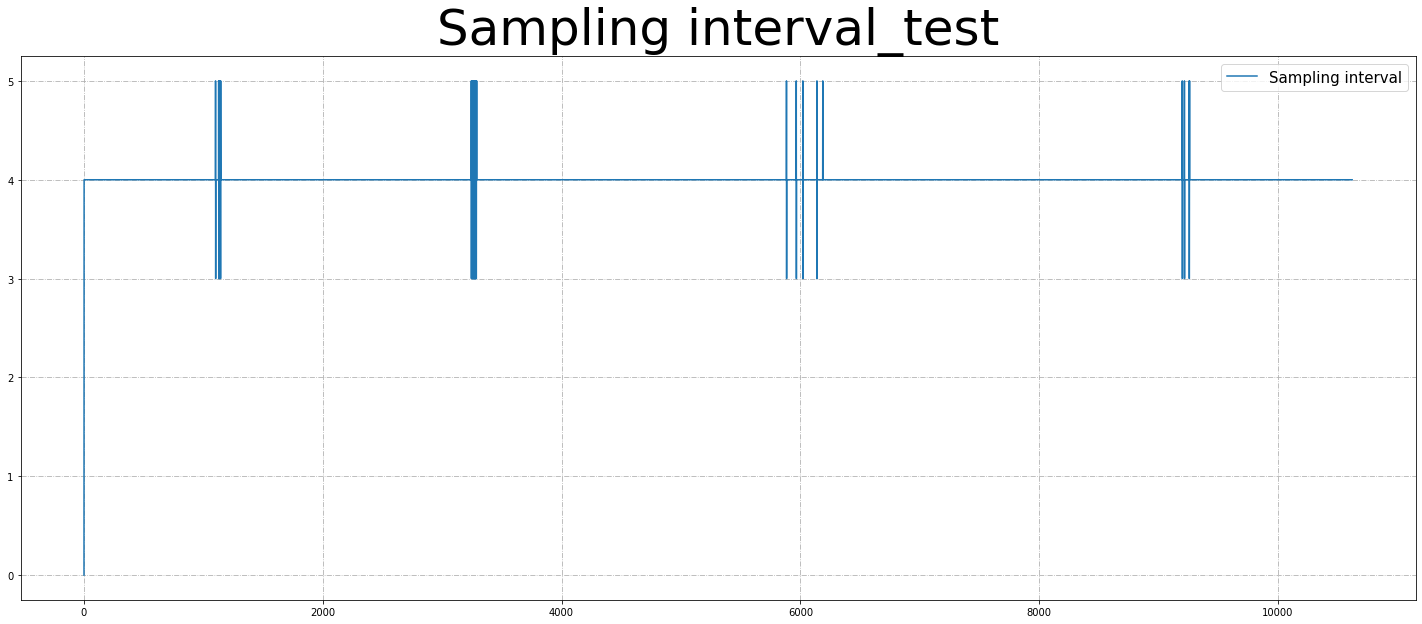

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.grid(alpha=1,linestyle='-.') 
plt.plot(t2,label='Sampling interval')
# plt.xticks(list(range(0 ,test1.shape[1],10)))  # 调整刻度范围和刻度标签
# plt.xlabel('Time / h',fontsize=20)  
# plt.ylabel('Temperature / ℃', fontsize=20)  
plt.legend(prop = {'size':15})
plt.title('Sampling interval_test',fontsize=50) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

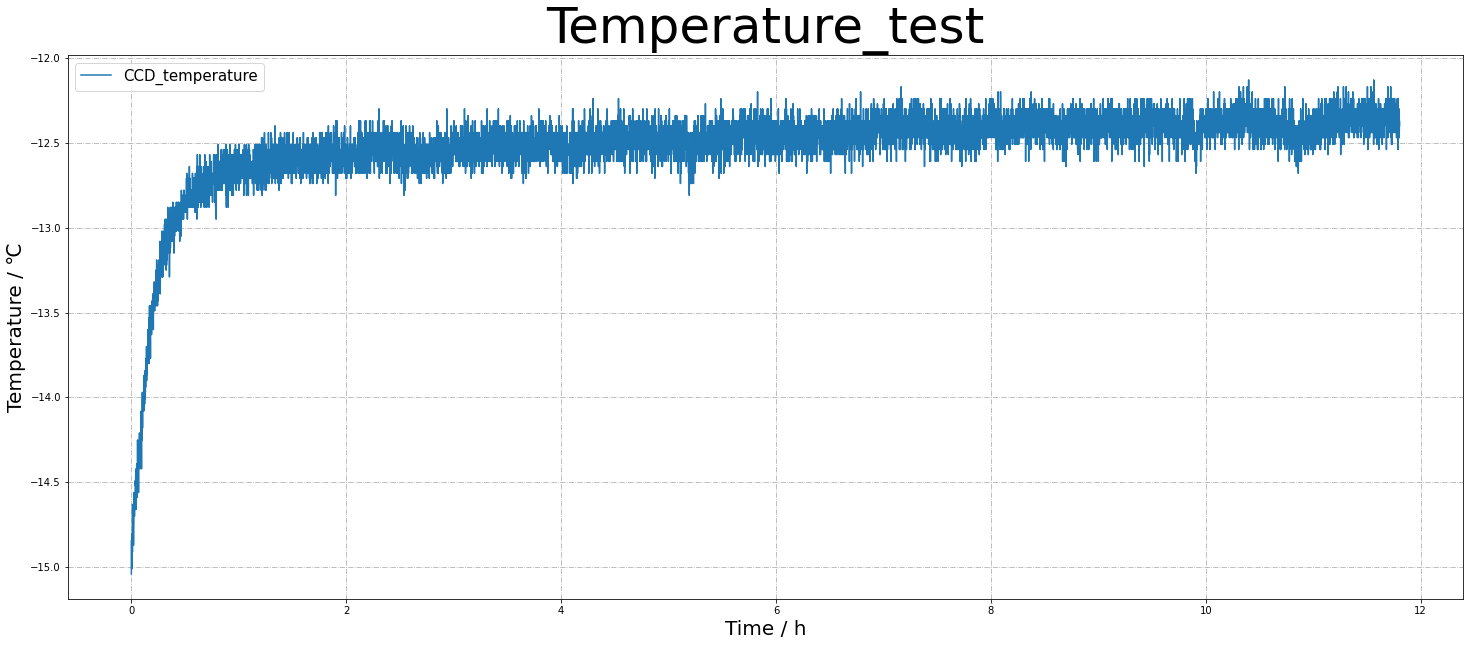

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.grid(alpha=1,linestyle='-.') 
plt.plot(T, ordered_list[:,1],label='CCD_temperature')
# plt.xticks(list(range(0 ,test1.shape[1],10)))  # 调整刻度范围和刻度标签
plt.xlabel('Time / h',fontsize=20)  
plt.ylabel('Temperature / ℃', fontsize=20)  
plt.legend(prop = {'size':15})
plt.title('Temperature_test',fontsize=50) 
plt.show